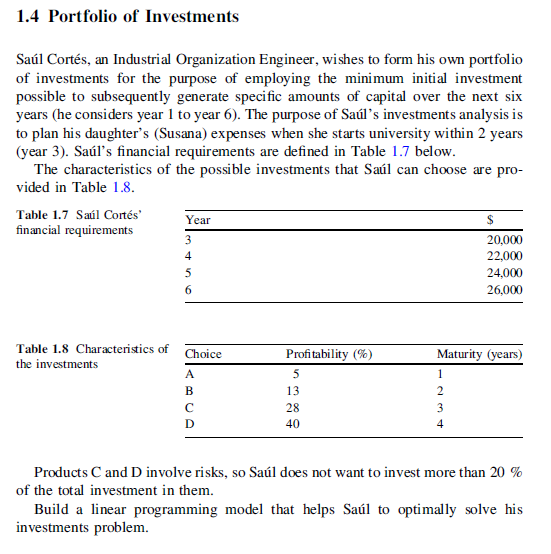

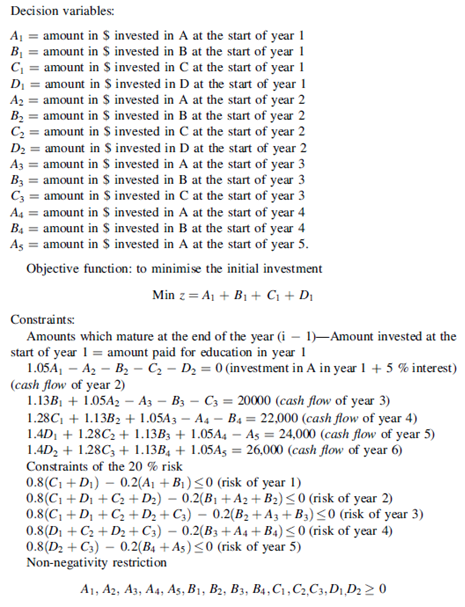

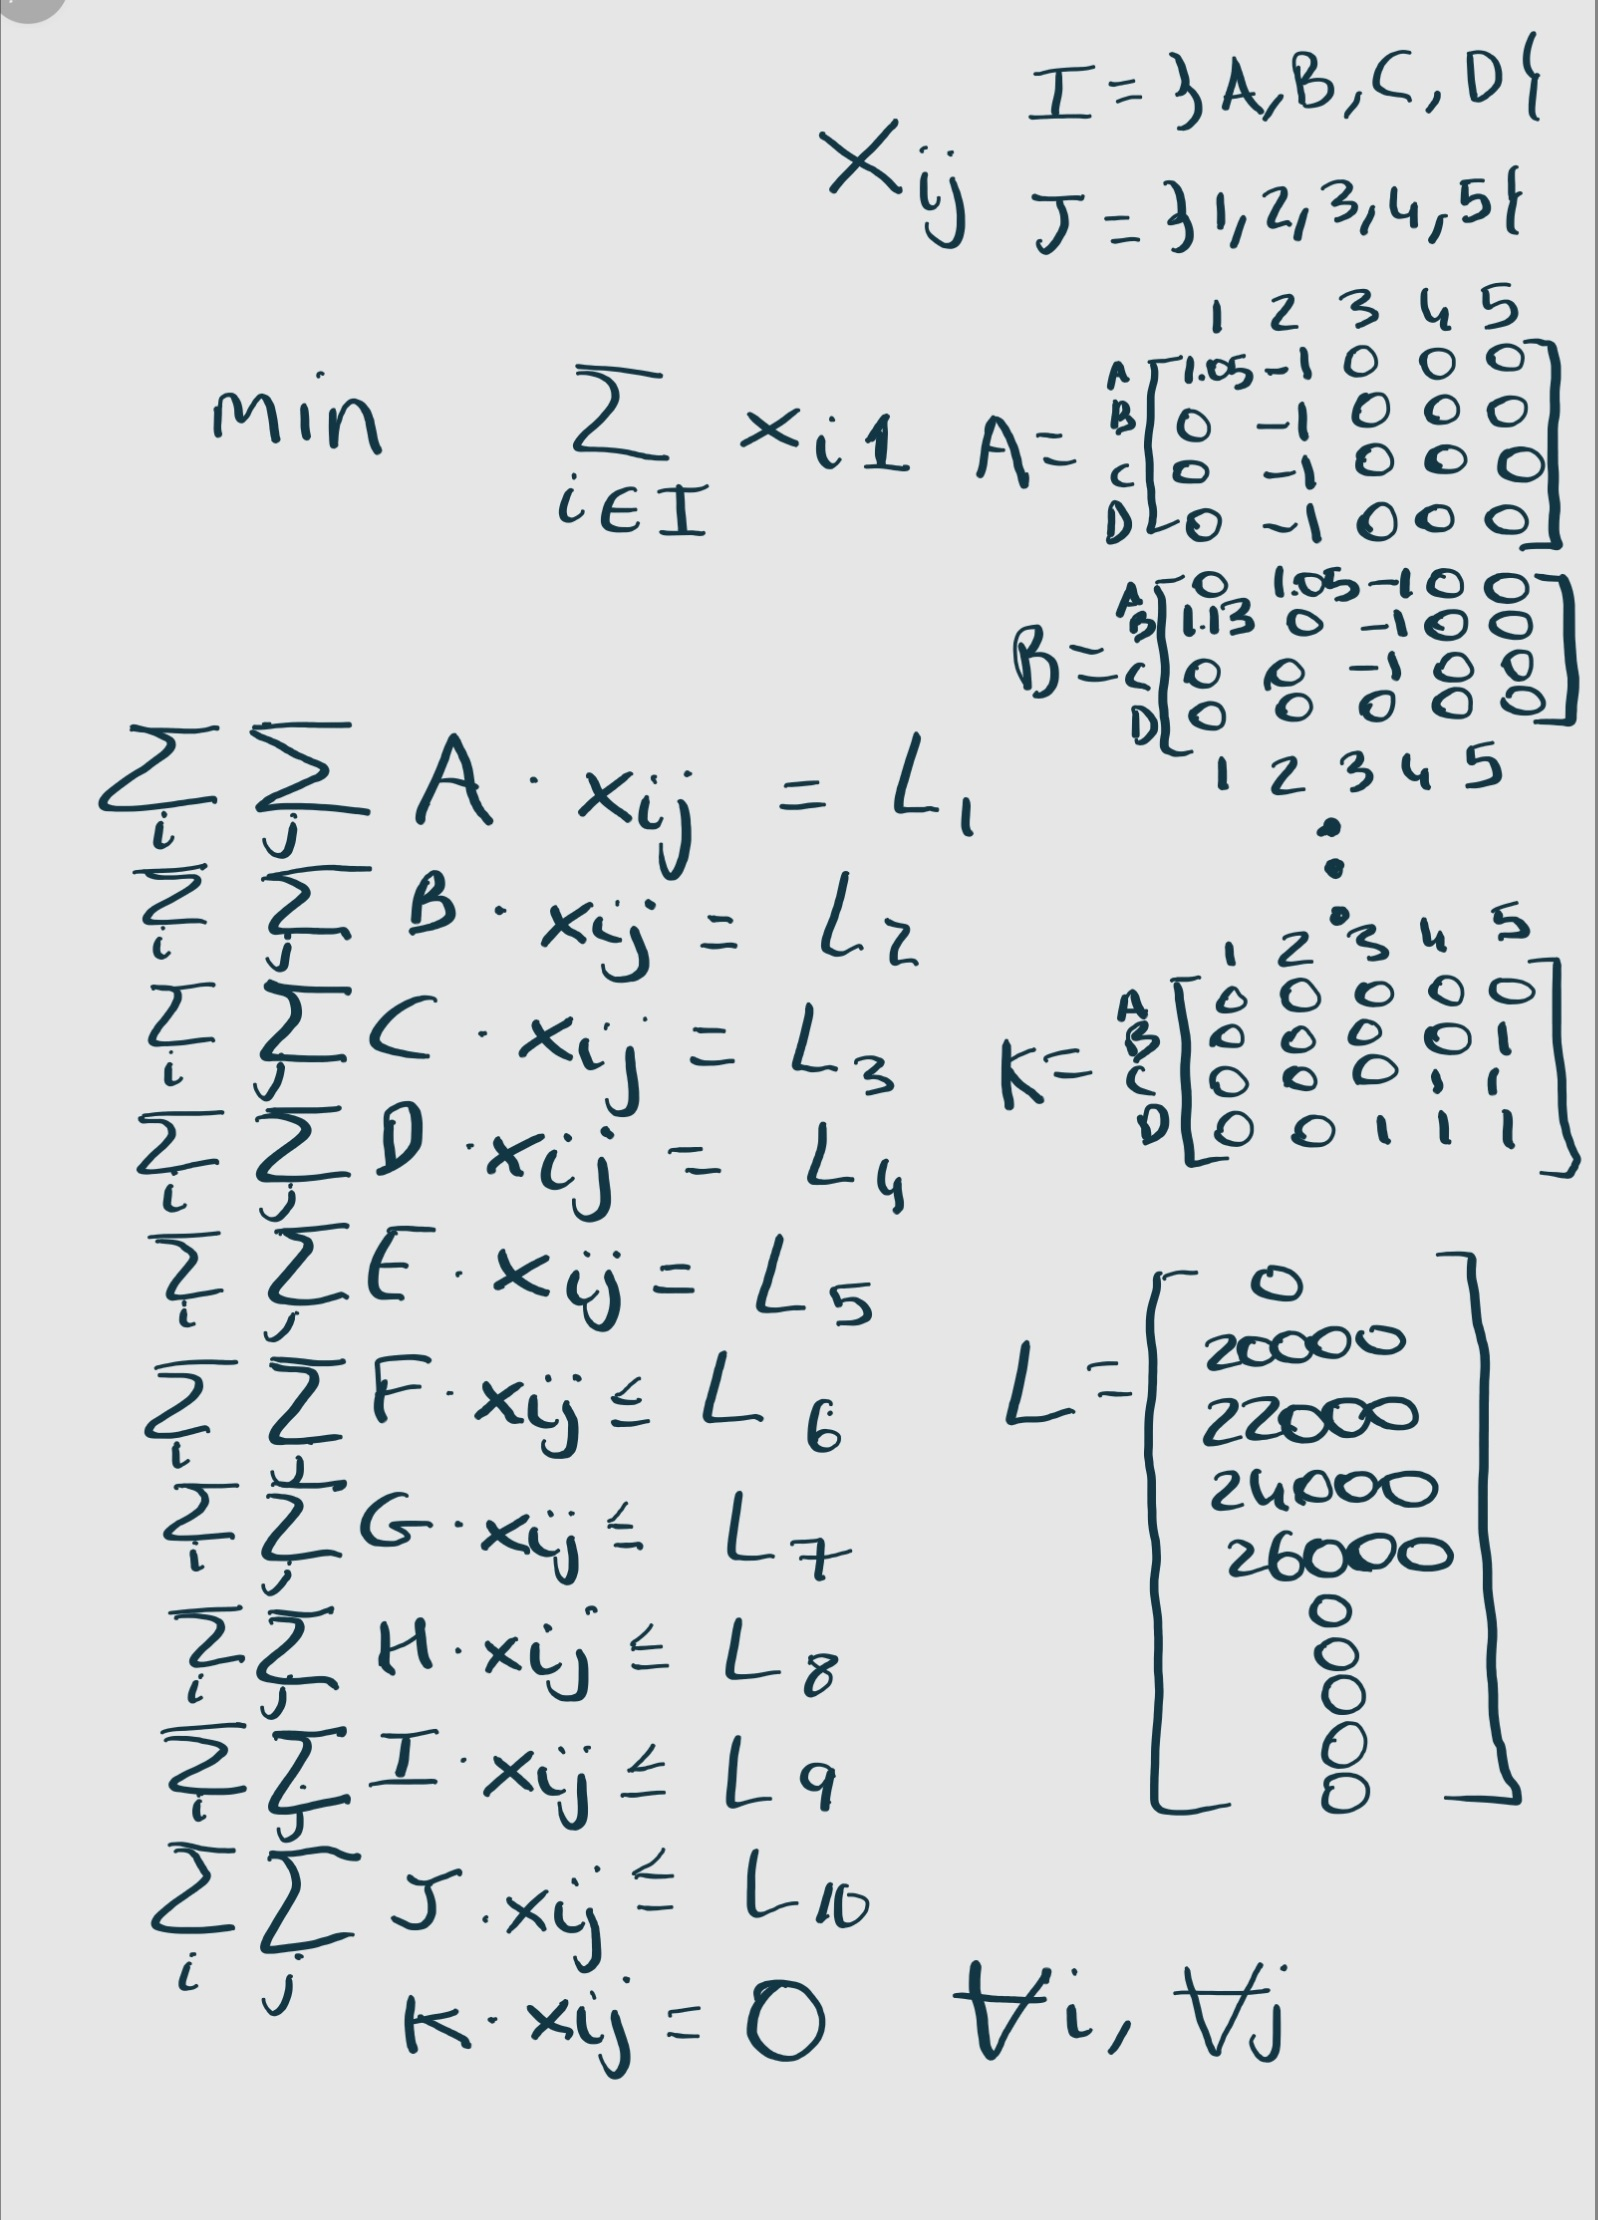

To make it more coherent with the other Colab and solvable, we will:
- Include the variables xD5, xD4, xD3, xC5, xC4, xB5, even though we know they are 0.
- This problem is a bit difficult to model with sets due to its irregularity, so it is preferred to have 1 matrix per constraint, except for the last constraint that sets xD5, xD4, xD3, xC5, xC4, xB5 to 0.

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
#Defining the model

model = pyo.ConcreteModel()

In [4]:
#Defining the sets

model.i=pyo.Set(initialize = ["xA","xB","xC","xD"])
model.j=pyo.Set(initialize = ["1","2","3","4","5"])
model.k=pyo.RangeSet(1,10)

In [5]:
#Defining the parameters

model.A = pyo.Param(model.i,model.j, initialize={("xA","1"):1.05,("xA","2"):-1,("xA","3"):0,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):0,("xB","2"):-1,("xB","3"):0,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):-1,("xC","3"):0,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0,("xD","2"):-1,("xD","3"):0,("xD","4"):0,("xD","5"):0})
A = model.A

model.B = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):1.05,("xA","3"):-1,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):1.13,("xB","2"):0,("xB","3"):-1,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):0,("xC","3"):-1,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0,("xD","2"):0,("xD","3"):0,("xD","4"):0,("xD","5"):0})
B = model.B

model.C = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):1.05,("xA","4"):-1,("xA","5"):0,
                                                 ("xB","1"):0,("xB","2"):1.13,("xB","3"):0,("xB","4"):-1,("xB","5"):0,
                                                 ("xC","1"):1.28,("xC","2"):0,("xC","3"):0,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0,("xD","2"):0,("xD","3"):0,("xD","4"):0,("xD","5"):0})
C = model.C

model.D = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):0,("xA","4"):1.05,("xA","5"):-1,
                                                 ("xB","1"):0,("xB","2"):0,("xB","3"):1.13,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):1.28,("xC","3"):0,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):1.4,("xD","2"):0,("xD","3"):0,("xD","4"):0,("xD","5"):0})
D = model.D

model.E = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):0,("xA","4"):0,("xA","5"):1.05,
                                                 ("xB","1"):0,("xB","2"):0,("xB","3"):0,("xB","4"):1.13,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):0,("xC","3"):1.28,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0,("xD","2"):1.4,("xD","3"):0,("xD","4"):0,("xD","5"):0})
E = model.E

model.F = pyo.Param(model.i,model.j, initialize={("xA","1"):-0.2,("xA","2"):0,("xA","3"):0,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):-0.2,("xB","2"):0,("xB","3"):0,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0.8,("xC","2"):0,("xC","3"):0,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0.8,("xD","2"):0,("xD","3"):0,("xD","4"):0,("xD","5"):0})
F = model.F

model.G = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):-0.2,("xA","3"):0,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):-0.2,("xB","2"):-0.2,("xB","3"):0,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0.8,("xC","2"):0.8,("xC","3"):0,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0.8,("xD","2"):0.8,("xD","3"):0,("xD","4"):0,("xD","5"):0})
G = model.G

model.H = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):-0.2,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):0,("xB","2"):-0.2,("xB","3"):-0.2,("xB","4"):0,("xB","5"):0,
                                                 ("xC","1"):0.8,("xC","2"):0.8,("xC","3"):0.8,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0.8,("xD","2"):0.8,("xD","3"):0,("xD","4"):0,("xD","5"):0})
H = model.H

model.I = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):0,("xA","4"):-0.2,("xA","5"):0,
                                                 ("xB","1"):0,("xB","2"):0,("xB","3"):-0.2,("xB","4"):-0.2,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):0.8,("xC","3"):0.8,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0.8,("xD","2"):0.8,("xD","3"):0,("xD","4"):0,("xD","5"):0})
I = model.I

model.J = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):0,("xA","4"):0,("xA","5"):-0.2,
                                                 ("xB","1"):0,("xB","2"):0,("xB","3"):0,("xB","4"):-0.2,("xB","5"):0,
                                                 ("xC","1"):0,("xC","2"):0,("xC","3"):0.8,("xC","4"):0,("xC","5"):0,
                                                 ("xD","1"):0,("xD","2"):0.8,("xD","3"):0,("xD","4"):0,("xD","5"):0})
J = model.J

model.K = pyo.Param(model.i,model.j, initialize={("xA","1"):0,("xA","2"):0,("xA","3"):0,("xA","4"):0,("xA","5"):0,
                                                 ("xB","1"):0,("xB","2"):0,("xB","3"):0,("xB","4"):0,("xB","5"):1,
                                                 ("xC","1"):0,("xC","2"):0,("xC","3"):0,("xC","4"):1,("xC","5"):1,
                                                 ("xD","1"):0,("xD","2"):0,("xD","3"):1,("xD","4"):1,("xD","5"):1})
K = model.K

model.L = pyo.Param(model.k,initialize={1:0,2:20000,3:22000,4:24000,5:26000,6:0,7:0,8:0,9:0,10:0})
L = model.L

In [6]:
#Decision variables

model.x=pyo.Var(model.i, model.j, within=pyo.NonNegativeReals)
x=model.x

In [7]:
#Objective rule and constraints
def Objective_rule(model):
  return sum(x[i,"1"] for i in model.i)
model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.minimize)

def Constraint1(model):
  return sum(sum(A[i,j]*x[i,j] for j in model.j) for i in model.i)  == L[1]
model.Const1 = pyo.Constraint(rule=Constraint1)

def Constraint2(model):
  return sum(sum(B[i,j]*x[i,j] for j in model.j) for i in model.i)  == L[2]
model.Const2 = pyo.Constraint(rule=Constraint2)

def Constraint3(model):
  return sum(sum(C[i,j]*x[i,j] for j in model.j) for i in model.i)  == L[3]
model.Const3 = pyo.Constraint(rule=Constraint3)

def Constraint4(model):
  return sum(sum(D[i,j]*x[i,j] for j in model.j) for i in model.i)  == L[4]
model.Const4 = pyo.Constraint(rule=Constraint4)

def Constraint5(model):
  return sum(sum(E[i,j]*x[i,j] for j in model.j) for i in model.i)  == L[5]
model.Const5 = pyo.Constraint(rule=Constraint5)

def Constraint6(model):
  return sum(sum(F[i,j]*x[i,j] for j in model.j) for i in model.i)  <= L[6]
model.Const6 = pyo.Constraint(rule=Constraint6)

def Constraint7(model):
  return sum(sum(G[i,j]*x[i,j] for j in model.j) for i in model.i)  <= L[7]
model.Const7 = pyo.Constraint(rule=Constraint7)

def Constraint8(model):
  return sum(sum(H[i,j]*x[i,j] for j in model.j) for i in model.i)  <= L[8]
model.Const8 = pyo.Constraint(rule=Constraint8)

def Constraint9(model):
  return sum(sum(I[i,j]*x[i,j] for j in model.j) for i in model.i)  <= L[9]
model.Const9 = pyo.Constraint(rule=Constraint9)

def Constraint10(model):
  return sum(sum(J[i,j]*x[i,j] for j in model.j) for i in model.i)  <= L[10]
model.Const10 = pyo.Constraint(rule=Constraint10)

def Constraint11(model,i,j):
  if ((K[i,j] for j in model.j) for i in model.i) == 0:
    return Constraint11.Skip
  else:
    return K[i,j]*x[i,j] == 0
model.Const11 = pyo.Constraint(model.i,model.j,rule=Constraint11)

In [8]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [9]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 73314.7149569321
  Upper bound: 73314.7149569321
  Number of objectives: 1
  Number of constraints: 30
  Number of variables: 21
  Number of nonzeros: 60
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.00908660888671875
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [10]:
print("objective function: ", model.Obj())
for i,j in x:
    print('Investment in product ',i,' in year',j,': ', x[i,j](), ' €')

objective function:  73314.71495693212
Investment in product  xA  in year 1 :  0.0  €
Investment in product  xA  in year 2 :  0.0  €
Investment in product  xA  in year 3 :  38227.50468316  €
Investment in product  xA  in year 4 :  0.0  €
Investment in product  xA  in year 5 :  0.0  €
Investment in product  xB  in year 1 :  61064.1052295767  €
Investment in product  xB  in year 2 :  0.0  €
Investment in product  xB  in year 3 :  10774.9342262617  €
Investment in product  xB  in year 4 :  23008.8495575221  €
Investment in product  xB  in year 5 :  0.0  €
Investment in product  xC  in year 1 :  3804.66378140947  €
Investment in product  xC  in year 2 :  0.0  €
Investment in product  xC  in year 3 :  0.0  €
Investment in product  xC  in year 4 :  0.0  €
Investment in product  xC  in year 5 :  0.0  €
Investment in product  xD  in year 1 :  8445.94594594595  €
Investment in product  xD  in year 2 :  0.0  €
Investment in product  xD  in year 3 :  0.0  €
Investment in product  xD  in year 4 : 